In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

%matplotlib inline

# Data

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/seankross/a412dfbd88b3db70b74b/raw/5f23f993cd87c283ce766e7ac6b329ee7cc2e1d1/mtcars.csv')
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [3]:
df_fet = df[df.columns[1:]]
X = df_fet
df_fet.tail() # features

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [62]:
sc_mm = MinMaxScaler()
sc_sd = StandardScaler()


X_scaled_mm = sc_mm.fit_transform(X)
X_scaled_sd = sc_sd.fit_transform(X)

# Fit with standardize X

X = X_scaled_sd

# Clustering

In [63]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)
kmeans.cluster_centers_

array([[ 0.65434556, -0.80198323, -0.78027295, -0.72065399,  0.542813  ,
        -0.63153097,  0.4760978 ,  0.68593553,  0.41712001,  0.43033148,
        -0.3363536 ],
       [-0.84130144,  1.0311213 ,  1.00320808,  0.92655513, -0.69790243,
         0.81196838, -0.61212574, -0.8819171 , -0.53629716, -0.55328334,
         0.43245462]])

In [64]:
kmeans.score(X)

-184.85816006895507

In [65]:
labels = kmeans.labels_

kmeans.labels_

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

In [66]:
X_kmeans = kmeans.transform(X)
# cols = ['pc%s' % i for i in range(1,len(pca.explained_variance_)+1)]
kmeans_df = pd.DataFrame(data = X_kmeans) # , columns = cols)
kmeans_df['car'] = df['model']
kmeans_df.tail()

,0,1,car
27,2.579804,6.295605,Lotus Europa
28,5.195760,3.917298,Ford Pantera L
29,4.040979,4.342607,Ferrari Dino
30,6.676020,4.728693,Maserati Bora
31,1.226268,5.155800,Volvo 142E


Text(0.5, 0, 'Similarity to group 1')

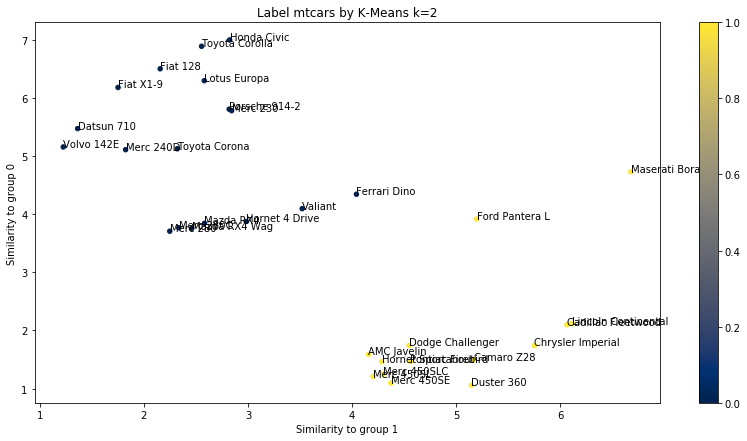

In [80]:
# Plot with annotation
# https://stackoverflow.com/questions/15910019/annotate-data-points-while-plotting-from-pandas-dataframe/15911372#15911372
fig, ax = plt.subplots(figsize=(14,7))
ax = kmeans_df[[0,1]].plot.scatter(x=0,y=1,c=labels,colormap='cividis', ax=ax)
kmeans_df[[0,1,'car']].apply(lambda row: ax.text(*row),axis=1);
plt.title('Label mtcars by K-Means k=2')
plt.ylabel('Similarity to group 0')
plt.xlabel('Similarity to group 1')

# Principle Component

In [74]:
# pca = PCA(n_components=2) # Get two components that explain the most
pca = PCA(n_components=0.9, svd_solver='full') # Get components that explain 90% of variability in data

pca.fit(X)

PCA(n_components=0.9, svd_solver='full')

In [75]:
pca.explained_variance_

array([6.82157445, 2.73596686, 0.64742944, 0.27829413])

In [76]:
pca.components_

array([[ 0.3625305 , -0.37391603, -0.3681852 , -0.33005692,  0.29415138,
        -0.34610332,  0.20045635,  0.30651132,  0.23494289,  0.20691624,
        -0.21401766],
       [ 0.0161244 ,  0.04374371, -0.04932413,  0.24878402,  0.27469408,
        -0.14303825, -0.46337482, -0.23164699,  0.42941765,  0.46234863,
         0.41357106],
       [-0.22574419, -0.17531118, -0.06148414,  0.14001476,  0.16118879,
         0.34181851,  0.40316904,  0.42881517, -0.20576657,  0.28977993,
         0.52854459],
       [-0.02254025, -0.00259184,  0.25660788, -0.06767616,  0.85482874,
         0.24589931,  0.06807653, -0.21484862, -0.03046291, -0.26469052,
        -0.12678918]])

In [77]:
X_pca = pca.transform(X)
cols = ['pc%s' % i for i in range(1,len(pca.explained_variance_)+1)]
pca_df = pd.DataFrame(data = X_pca, columns = cols)
pca_df['car'] = df['model']
pca_df.tail()

,pc1,pc2,pc3,pc4,car
27,3.385706,1.378599,-0.453865,-1.171650,Lotus Europa
28,-1.372957,3.500000,-0.136545,0.599541,Ford Pantera L
29,0.000990,3.219072,0.402094,-0.953957,Ferrari Dino
30,-2.669126,4.379677,1.352901,-0.891371,Maserati Bora
31,2.420593,0.233640,0.411765,0.227126,Volvo 142E


Text(0.5, 1.0, 'PC1, PC2 of mtcars')

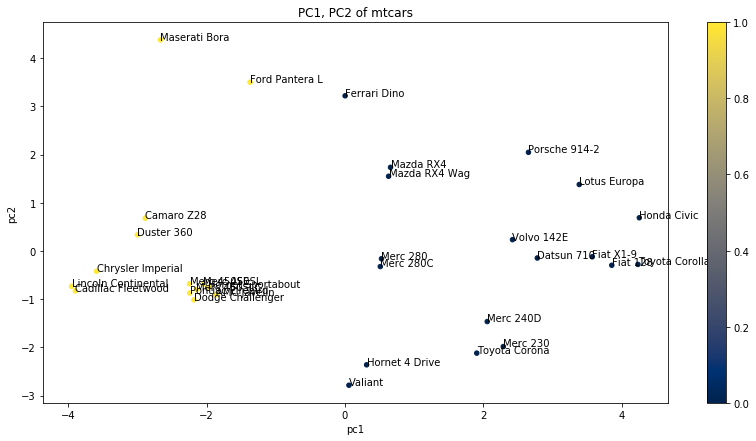

In [78]:
fig, ax = plt.subplots(figsize=(14,7))
ax = pca_df[['pc1','pc2']].plot.scatter(x='pc1',y='pc2',c=labels,colormap='cividis',ax=ax)
pca_df[['pc1','pc2','car']].apply(lambda row: ax.text(*row),axis=1)
plt.xlabel('pc1')
plt.title('PC1, PC2 of mtcars')

Text(0.5, 1.0, '% of variability in data explained to number of principle components')

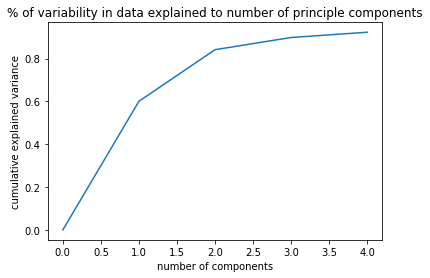

In [93]:
# Start from 0
# data = [(i+1, k) for i, k in enumerate(pca.explained_variance_ratio_)]
data = np.insert(pca.explained_variance_ratio_, 0, 0)
plt.plot(np.cumsum(data))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.title("% of variability in data explained to number of principle components")

# Result

K-means and PCA can be roughly combined and used to develop metric for grouping cars in mtcars data set as follow.

In [100]:
df['group'] = labels
df['pc1'] = pca_df[['pc1']]
df['pc2'] = pca_df[['pc2']]
df['group1_similarity'] = kmeans_df[[0]]
df['group0_similarity'] = kmeans_df[[1]]
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,group,pc1,pc2,group0_similarity,group1_similarity
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,0,0.657213,1.735446,3.843201,2.582254
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,0,0.629396,1.550033,3.751033,2.457550
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,0,2.779397,-0.146457,5.471664,1.364106
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,0,0.311771,-2.363019,3.874537,2.984163
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,-1.974489,-0.754402,1.462176,4.283344
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1,0,0.056138,-2.786000,4.094562,3.520194
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4,1,-3.002674,0.334887,1.059143,5.144735
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2,0,2.055329,-1.465181,5.109245,1.824733
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,0,2.287408,-1.983526,5.779413,2.842382
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4,0,0.526381,-0.162013,3.707537,2.248710
